Import Data

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_stata("callreports_final.dta", chunksize=100000, preserve_dtypes=True)

df_raw = pd.DataFrame()

for chunk in data:
    df_raw=df_raw.append(chunk)

Additional Settings

In [22]:
%matplotlib inline
import numpy as np
import seaborn as sns
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Leverage Ratio: L = Assets/Equity (Commercial banks aggregated by bhc)

In [23]:
df = df_raw[["name", "bhcid", "rssdid","assets",'year', "quarter", "equity"]]
#df = df[df.quarter==4]
df_indBanks = df[df.bhcid == 0]
df = df[df.bhcid != 0]
df = df.groupby(["bhcid","year", "quarter"]).agg({"assets":"sum",
                                  "equity":"sum"})

df["leverageRatio"] = df.assets/df.equity 
df.index.names = ["rssdid", "year", "quarter"]
df_indBanks["leverageRatio"] = df_indBanks.assets/df_indBanks.equity
df_indBanks.set_index([df_indBanks.rssdid, df_indBanks.year, df_indBanks.quarter], inplace=True)
df_indBanks = df_indBanks[["rssdid","bhcid", "year", "quarter", "assets", "equity", "leverageRatio", "name"]]
df_indBanks.drop(["rssdid", "bhcid", "year", "quarter"], axis=1, inplace=True)
#df
df_all = pd.concat([df, df_indBanks])

print(df.head)

print(df_indBanks)

print(df_all)
#fig, ax = plt.subplot()
#ax.plot()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


<bound method NDFrame.head of                              assets    equity  leverageRatio
rssdid    year   quarter                                    
128146.0  1976.0 1.0        10986.0     956.0      11.491632
                 2.0        11870.0    1030.0      11.524272
                 3.0        11410.0    1061.0      10.754006
                 4.0        11559.0    1049.0      11.019066
          1977.0 1.0        11936.0    1068.0      11.176030
...                             ...       ...            ...
4534101.0 2013.0 4.0       145922.0   15876.0       9.191358
4552356.0 2013.0 4.0        89248.0   10119.0       8.819844
4553960.0 2013.0 4.0       412436.0   43104.0       9.568393
4556381.0 2013.0 4.0       123832.0   14899.0       8.311430
4558901.0 2013.0 4.0      1323371.0  121814.0      10.863866

[718187 rows x 3 columns]>
                            assets    equity  leverageRatio                  name
rssdid    year   quarter                                           

Clean data of inf values.

In [24]:
df_all.leverageRatio.replace([np.inf, -np.inf], np.nan, inplace=True)
df_all.dropna(how="all", subset=["leverageRatio"],inplace=True)
#df_all.leverageRatio.describe()
df = df_all.reset_index(level="quarter")
df = df.reset_index(level="year")
df
#df = df[(df.leverageRatio < 20) & (df.leverageRatio > 0)]
#df
#df.leverageRatio.describe()
#print(df_all[df_all.leverageRatio > 200])
#df_all.head(15)

,year,quarter,assets,equity,leverageRatio,name
rssdid,,,,,,
128146.0,1976.0,1.0,10986.0,956.0,11.491632,NaN
128146.0,1976.0,2.0,11870.0,1030.0,11.524272,NaN
128146.0,1976.0,3.0,11410.0,1061.0,10.754006,NaN
128146.0,1976.0,4.0,11559.0,1049.0,11.019066,NaN
128146.0,1977.0,1.0,11936.0,1068.0,11.176030,NaN
...,...,...,...,...,...,...
4262543.0,2013.0,2.0,742574.0,168484.0,4.407386,ALOSTAR BK OF CMRC
4262543.0,2013.0,3.0,770830.0,170330.0,4.525509,ALOSTAR BK OF CMRC
4262543.0,2013.0,4.0,808999.0,168617.0,4.797850,ALOSTAR BK OF CMRC


Biggest bhc

Average leverage per year. 2000-2011

        LeverageAllBanks  LeverageTop10Banks  LeverageRestBanks
2005/1         10.144272           10.101014          10.144342
2005/2          9.939512           10.010578           9.939398
2005/3          9.939293           10.250582           9.938794
2005/4         10.066024           10.321327          10.065614
2006/1         10.029264           10.240525          10.028924
2006/2         10.053911           10.428010          10.053307
2006/3          9.720684           10.200453           9.719907
2006/4          9.790292           10.208409           9.789611
2007/1          9.701267           10.126187           9.700572
2007/2          9.739841           10.264149           9.738979
2007/3          9.537615           10.770352           9.535585
2007/4          9.596092           10.722923           9.594234
2008/1          9.594154           10.889319           9.592007
2008/2          9.878902           10.597255           9.877707
2008/3          9.945731           12.71

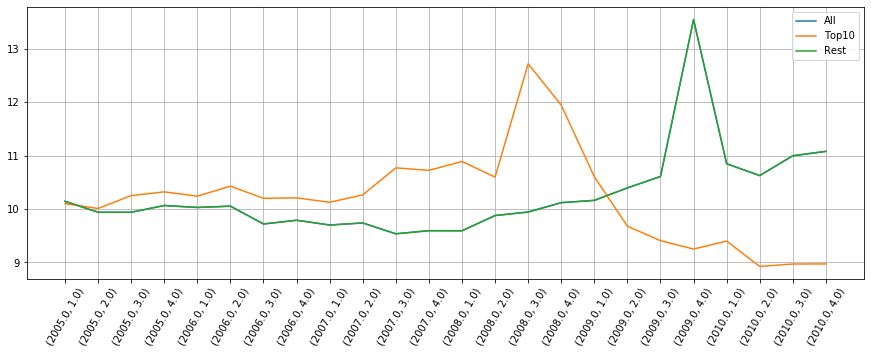

In [35]:
df.drop(df[df.equity<=0].index, inplace=True)
#calculate average of leverage per year and quarter
df_forLabels = df[(df.year>2004) & (df.year<2011) ]
df_mean = df[(df.year>2004) & (df.year<2011) ]
df_mean = df_mean.groupby(["year", "quarter"]).agg({"leverageRatio":"mean"})
df_mean.sort_values(by=["year", "quarter"])
#print(df_mean)
#sort values
df_forLabels.sort_values(by=["year", "quarter"])
df_forLabels = df_forLabels[["year", "quarter"]]
#create labels for graph
arrayIndex = []
df_forLabels = df_forLabels.drop_duplicates()
df_forLabels = df_forLabels[["year", "quarter"]].astype(int)
for row in df_forLabels.itertuples():
    dictRow = row._asdict()
    arrayIndex.append(str(dictRow["year"]) + "/" + str(dictRow["quarter"]))

#print(arrayIndex)
#make rssdid int
#df_mean.index = df_mean.index.astype(int)
# create mean values per year and quarter
arrayMeanLeverage = []
arrayTop10MeanLeverage = []
arrayRestMeanLeverage = []
year = 2005
quarter = 1
for i in range(6):
    #print(year)
    temp_df1 = df.copy()
    for y in range(4):
        temp_df2 = temp_df1[(temp_df1["quarter"]==quarter) & (temp_df1["year"]==year)]
        #top10 berechnen
        temp_df2.sort_values("assets", ascending=False, inplace=True)
        df_top10 = temp_df2.head(10)
        meanLeverage = df_top10.leverageRatio.mean()
        arrayTop10MeanLeverage.append(meanLeverage)
        #average leverage over rest banks
        df_rest = temp_df2.iloc[10:,:]
        meanLeverage = df_rest.leverageRatio.mean()
        arrayRestMeanLeverage.append(meanLeverage)
        #average leverage over all banks
        meanLeverage = temp_df2.leverageRatio.mean()
        arrayMeanLeverage.append(meanLeverage)
        quarter = quarter + 1
    year = year + 1
    quarter = 1
#create graph
fig, ax = plt.subplots(figsize=(15,5));
#ax.set_xticks(df_mean.index)

#create new dataframe with computed values
d2 = {"LeverageAllBanks" : arrayMeanLeverage, "LeverageTop10Banks" : arrayTop10MeanLeverage, "LeverageRestBanks" : arrayRestMeanLeverage}
temp_df = pd.DataFrame(data=d2, index=arrayIndex)
#print(d2)
#temp_df = pd.DataFrame(data=d2, index=arrayIndex)
ax.plot(temp_df)
ax.grid()
ax.set_xticklabels(df_mean.index, rotation=60)
ax.legend(["All", "Top10", "Rest"])
print(temp_df)
#df_mean

Analysing 2009/2 in detail.

In [26]:
temp_df1 = df.copy()
temp_df2 = temp_df1[(temp_df1["quarter"]==2) & (temp_df1["year"]==2009)]
temp_df2[temp_df2.leverageRatio < 5]
#temp_df2.leverageRatio.describe()


,year,quarter,assets,equity,leverageRatio,name
rssdid,,,,,,
1032099.0,2009.0,2.0,968385.0,-8552.0,-113.234916,NaN
1052958.0,2009.0,2.0,70108.0,14304.0,4.901286,NaN
1055584.0,2009.0,2.0,54205.0,12623.0,4.294146,NaN
1056125.0,2009.0,2.0,44527.0,12800.0,3.478672,NaN
1058101.0,2009.0,2.0,22932.0,4612.0,4.972246,NaN
1058138.0,2009.0,2.0,85683.0,17192.0,4.983888,NaN
1059519.0,2009.0,2.0,23236.0,5907.0,3.933638,NaN
1061594.0,2009.0,2.0,118710.0,24012.0,4.943778,NaN
1063516.0,2009.0,2.0,19413.0,5532.0,3.509219,NaN
